In [79]:
# Importing libraries..
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd

In [80]:
# Reading data
df = pd.read_csv("/Users/sidharthagarwal/Desktop/assignments/ml774/data/q3/logisticX.csv")
X  = df.to_numpy()

# adding intercept in X
X = np.append(X,np.ones((X.shape[0],1)),axis = 1)

dfY = pd.read_csv("/Users/sidharthagarwal/Desktop/assignments/ml774/data/q3/logisticY.csv")
Y = dfY.to_numpy()

print(X.shape)
print(Y.shape)

(99, 3)
(99, 1)


In [81]:
# Normalizing the data

mean = np.mean(X[:,0:2],axis = 0)
std  = np.std(X[:,0:2],axis = 0)

X[:,0:2] = X[:,0:2]-mean
X[:,0:2] = X[:,0:2]/std

print(mean)
print(std)


[4.62606263 4.52602323]
[1.32353523 1.39379711]


In [82]:
# initialization of parameters
theta = np.zeros((X.shape[1],1))
epsilon = 0.01
print(theta)

[[0.]
 [0.]
 [0.]]


In [83]:
# helper functions to calculate the hypothesis, hessian, gradients and training algorithm

# finding the hypothesis
def sigmoid(X,theta):
    y_temp = (1/(1+np.exp(-1*np.dot(X,theta))))
    return y_temp

# finding the hessian using the formula XT.diag.X
def returnHes(X,Y,theta):
    y_hyp = sigmoid(X,theta)
    diag = np.identity(X.shape[0])*np.dot(y_hyp.transpose(),(1-y_hyp))
    return np.dot(X.transpose(),np.dot(diag,X))
    
# finding the gradient..
def returnGrad(X,Y,theta):
    return np.dot(X.transpose(),sigmoid(X,theta)-Y)

# converging the algorithm..
def newton_method(X,Y,theta):
    diff = np.inf
    iterations = 0
              
    while diff>epsilon:
              
        hessian = returnHes(X,Y,theta)
        hessian_inv = np.linalg.inv(hessian)
        gradient = returnGrad(X,Y,theta)
        
        new_theta = theta - np.dot(hessian_inv,gradient)
        diff = abs(np.linalg.norm(new_theta - theta))
        theta = new_theta
        
        print("Iteration : "+str(iterations)+" ==> "+str(diff))
        iterations += 1
    
    print("Number of iterations taken: "+str(iterations))
    print("Final theta : "+str(theta))
    return theta

In [84]:
# running the algorithm
theta = newton_method(X,Y,theta)

Iteration : 0 ==> 0.013014544222235525
Iteration : 1 ==> 0.012883907233990482
Iteration : 2 ==> 0.012756194989847253
Iteration : 3 ==> 0.012631318098700486
Iteration : 4 ==> 0.012509190090937433
Iteration : 5 ==> 0.01238972733399291
Iteration : 6 ==> 0.012272848949301089
Iteration : 7 ==> 0.012158476730672597
Iteration : 8 ==> 0.012046535064127008
Iteration : 9 ==> 0.011936950849210443
Iteration : 10 ==> 0.011829653421827874
Iteration : 11 ==> 0.01172457447861735
Iteration : 12 ==> 0.01162164800289182
Iteration : 13 ==> 0.011520810192171245
Iteration : 14 ==> 0.011421999387324449
Iteration : 15 ==> 0.011325156003337295
Iteration : 16 ==> 0.011230222461719983
Iteration : 17 ==> 0.011137143124562418
Iteration : 18 ==> 0.011045864230244026
Iteration : 19 ==> 0.010956333830799506
Iteration : 20 ==> 0.010868501730939636
Iteration : 21 ==> 0.010782319428722369
Iteration : 22 ==> 0.010697740057866164
Iteration : 23 ==> 0.010614718331695153
Iteration : 24 ==> 0.010533210488701766
Iteration : 2

Text(0, 0.5, 'x2')

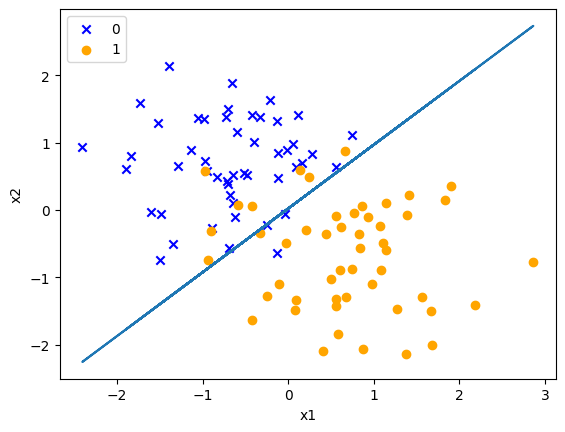

In [91]:
# plotting the graph..
y0 = []
x10 = []
x20 = []

y1 = []
x11 = []
x21 = []

for idx in range(X.shape[0]):
    if Y[idx][0] == 0:
        y0.append(idx)
        x10.append(X[idx][0])
        x20.append(X[idx][1])
    else:
        y1.append(idx)
        x11.append(X[idx][0])
        x21.append(X[idx][1])

plt.scatter(x10,x20,color = "blue",marker = "x",label = '0')
plt.scatter(x11,x21,color = "orange" ,marker = "o",label = '1')

# the equation of line in logistic regression ins thetaT.x = 0
y_line = (-1)*X[:,0]*theta[0][0]/theta[1][0] + (-1)*theta[2][0]/theta[1][0]
plt.plot(X[:,0],y_line)

plt.legend()

plt.xlabel("x1")
plt.ylabel("x2")